<a href="https://colab.research.google.com/github/akr1139/CO542-LAB-05/blob/main/E17285_CONCRETE_STRENGTH_PREDICTION(Submission).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing the necessary libraries**

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **ignoring the warnings**

In [100]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

# **setting the no.of rows and columns**

In [101]:
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',1000)

# **Mount the google drive**

In [102]:
from google.colab import drive
drive.mount('/gdrive')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


# **1.Load the dataset as a Pandas dataframe**

In [103]:
data = pd.read_excel('/content/drive/MyDrive/CO 542/LAB 05/Concrete_Data.xls')

# Check how is the dataSet

In [104]:
data.head(2) #display 2 first values of the dataSet

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [105]:
len(data) #check the lenght of the dataSet

1030

# Change the column names into shorter form

In [106]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

curr_col_names = list(data.columns)

mapper = {}
for i,name in enumerate(curr_col_names):
  mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [107]:
data.head(2)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [108]:
data.shape #find the shape of data

(1030, 9)

total 1030 observations and 9 features

# **CHECKING FOR NULL VALUES**

In [109]:
data.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

there are no null values in the data

In [110]:
data.info()# data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Describe the data

In [111]:
# .T transpose of requred data
data.describe().T #Get most valuable information of the dataSet

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
BlastFurnaceSlag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
FlyAsh,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
CC_Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


# plotting the Pearson Correlation coefficients between the features.

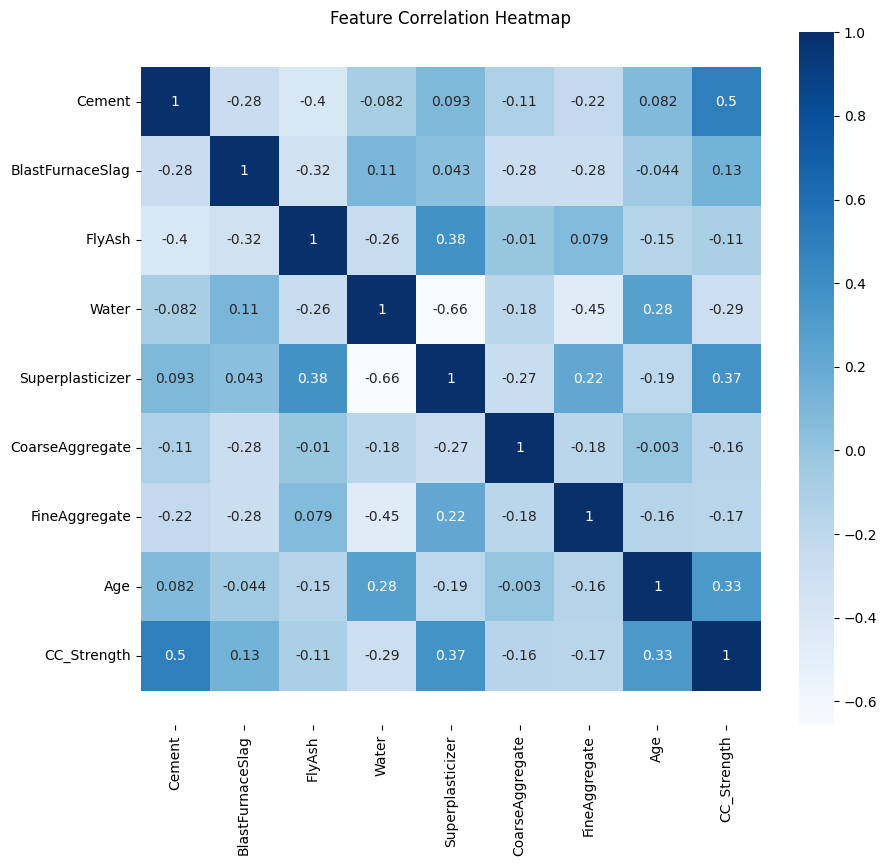

In [112]:
corr = data.corr()

plt.figure(figsize= (10,9))
sns.heatmap(corr, annot = True, cmap = 'Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **observations**

### There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.

### Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.

### Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.



We can further analyze these correlations visually by plotting these relations.

# 2. Separate the dataset into features and labels.
# Separating Input Features and Target Variable.

In [113]:
# X = data.iloc[:,:-1]
# # Features - All columns but last
# y = data.iloc[:,-1]
# # Target - Last Column

# print(x)
# print(y)

In [114]:
#seperate features and labels
features = data.iloc[:, 0:4]
labels = data.iloc[:, 4:5]

print(features.head())
print(labels.head())

   Cement  BlastFurnaceSlag  FlyAsh  Water
0   540.0               0.0     0.0  162.0
1   540.0               0.0     0.0  162.0
2   332.5             142.5     0.0  228.0
3   332.5             142.5     0.0  228.0
4   198.6             132.4     0.0  192.0
   Superplasticizer
0               2.5
1               2.5
2               0.0
3               0.0
4               0.0


In [115]:
#convert labels into numerical data
leb_enc = LabelEncoder()
leb_enc.fit(labels)
labels = leb_enc.transform(labels)

# 3. Split the data set as train and test data accordingly (E.g.: 90% training data, 10% test data)

In [116]:
# 3
from sklearn.model_selection import train_test_split

#split data into test and train
x_train, x_test, y_train, y_test = train_test_split(features,labels, train_size=0.9, test_size=0.1, random_state=1)


# 4. Scale the independent train and test datasets using Sklearn Standard Scaler.


The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

In [117]:
#4
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

x_train_scl
x_test_scl

array([[ 0.15598784, -0.8444379 ,  0.99533555, -0.32409712],
       [-0.40631778, -0.8444379 ,  0.62977173,  0.23651595],
       [-1.33905448,  0.69373282,  0.76847691,  0.86708749],
       [-0.73498737,  0.72495885, -0.83856847,  0.19113749],
       [-1.12977139,  1.54955714,  1.84504129,  1.62339517],
       [-0.03398413,  0.28686932, -0.4569342 , -0.99059326],
       [ 0.55590881, -0.8444379 , -0.83856847,  0.19113749],
       [ 0.58254484, -0.40496055, -0.83856847,  2.19062593],
       [ 0.88981047, -0.8444379 , -0.83856847,  0.40384903],
       [-0.66649472,  2.81131974, -0.83856847,  0.19113749],
       [-1.07316982, -0.35777456,  1.71756983, -2.83172978],
       [-0.65412799,  0.78972393, -0.83856847,  1.03252979],
       [ 0.30381781, -0.8444379 , -0.83856847, -0.16810866],
       [-1.37710595,  1.42234001,  0.690465  ,  0.81981825],
       [-0.40584214, -0.8444379 , -0.83856847,  0.19113749],
       [-1.2153872 ,  1.91964332, -0.83856847,  0.86708749],
       [-0.41154986,  1.

In [118]:
#Scale the x_train and x_test data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 5. Model the MLP using MLPRegressor (Use hidden layers as (256,128,64,32))

In [119]:
# 5. Model the MLP using MLPRegressor (Use hidden layers as (256,128,64,32))
# define the MLP and train

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='logistic', max_iter=300, random_state=1)

# Train the model

In [120]:
#6   Train the model
mlp.fit(x_train_scl, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(256, 128, 64, 32),
             max_iter=300, random_state=1)

# 7. Find the predicted concrete compressive strength for previously reserved test data sets and find the accuracy of the test set.


In [121]:
# 7. Find the predicted concrete compressive strength for previously reserved test data sets and find the accuracy of the test set.

y_pred = mlp.predict(x_test_scl)

print(mlp.score(x_test_scl, y_pred))

1.0


# 8. Do a cross validation for this model. Use the number of folds as 5


In [122]:
# 8. Do a cross validation for this model. Use the number of folds as 5
# This may take some time
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(mlp, x_train_scl, y_train, cv=5)

# 9. Plot the data using matplotlib.pyplot.boxplot


# Univariate analysis(Boxplot)

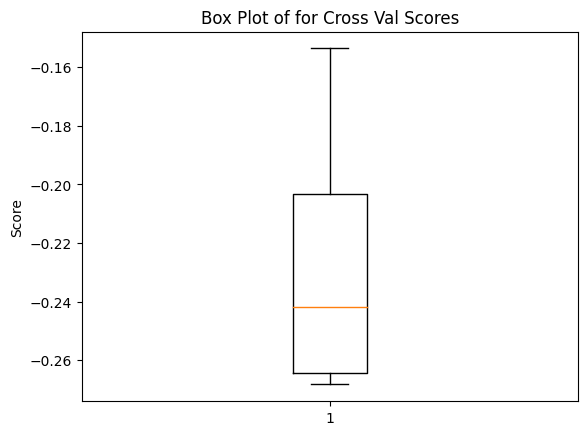

In [123]:
# 9. Plot the data using matplotlib.pyplot.boxplot
import matplotlib.pyplot as plt

plt.boxplot(cross_val_scores)
plt.title("Box Plot of for Cross Val Scores")
plt.ylabel("Score")
plt.show()